In [1]:
#!/usr/bin/env python
# coding: utf-8

from __future__ import division

import numpy as np
import time
import os
from sys import platform

import tensorflow as tf

import import_ipynb
from data_generators import ramp_generator

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

importing Jupyter notebook from data_generators.ipynb


In [2]:
# Specify whether or not to save images to file. Old files will be overwritten.
save_figures = True
dir_figures = './figures/'

if not os.path.exists(dir_figures):
    os.makedirs(dir_figures)

In [3]:
# Set font sizes for figures

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

import matplotlib
matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# Set RNG seeds, for repeatability
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# Display the prototypical ramps

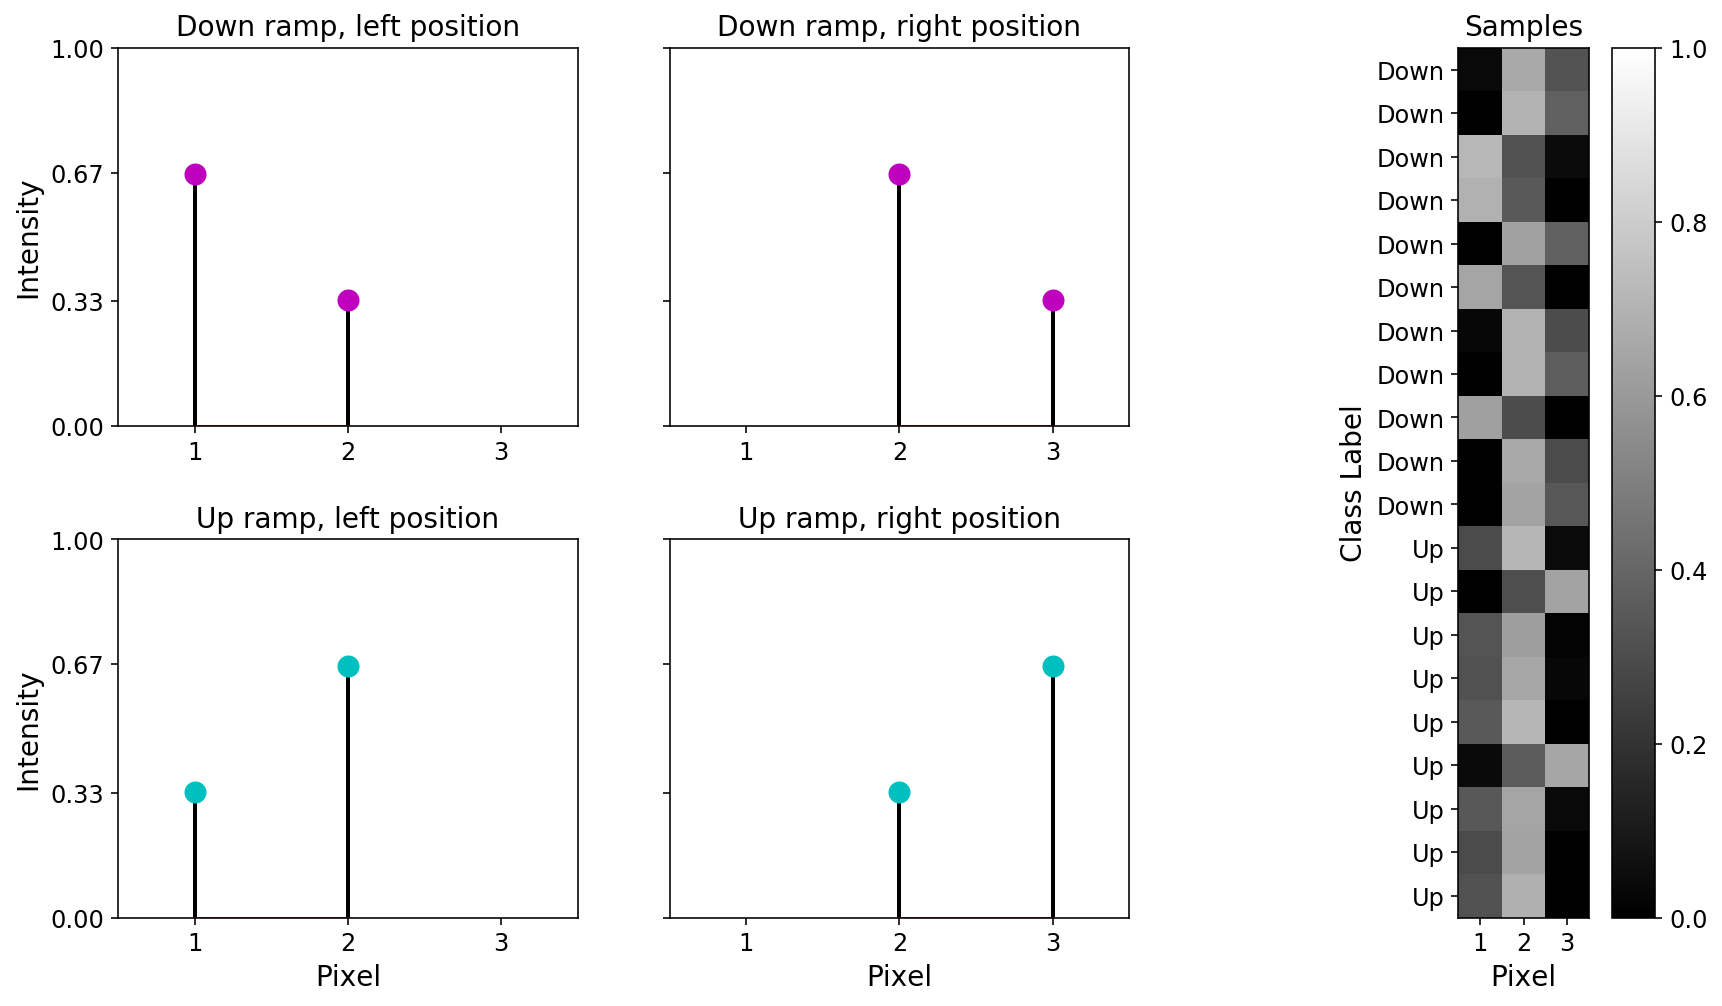

In [18]:
# plt.figure(figsize=(16,10))
plt.figure(figsize=(14,8))

ax = plt.subplot(2, 3, 1)
markerline, stemlines, baseline = plt.stem([1, 2], [0.666, 0.333],
                                           linefmt='k', markerfmt='mo', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 2)
plt.setp(markerline, markersize=10)
plt.axis([0.5, 3.5, 0, 1])
ax.set_xticks([1, 2, 3])
# ax.set_xticklabels([])
ax.set_yticks([0, 0.33, 0.67, 1.0])
plt.title('Down ramp, left position')
plt.ylabel('Intensity')

ax = plt.subplot(2, 3, 2)
markerline, stemlines, baseline = plt.stem([2, 3], [0.666, 0.333],
                                           linefmt='k', markerfmt='mo', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 2)
plt.setp(markerline, markersize=10)
plt.axis([0.5, 3.5, 0, 1])
ax.set_xticks([1, 2, 3])
# ax.set_xticklabels([])
ax.set_yticks([0, 0.33, 0.67, 1.0])
ax.set_yticklabels([])
plt.title('Down ramp, right position')

ax = plt.subplot(2, 3, 4)
markerline, stemlines, baseline = plt.stem([1, 2], [0.333, 0.666],
                                           linefmt='k', markerfmt='co', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 2)
plt.setp(markerline, markersize=10)
plt.axis([0.5, 3.5, 0, 1])
ax.set_xticks([1, 2, 3])
ax.set_yticks([0, 0.33, 0.67, 1.0])
plt.title('Up ramp, left position')
plt.xlabel('Pixel')
plt.ylabel('Intensity')

ax = plt.subplot(2, 3, 5)
markerline, stemlines, baseline = plt.stem([2, 3], [0.333, 0.666],
                                           linefmt='k', markerfmt='co', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 2)
plt.setp(markerline, markersize=10)
plt.axis([0.5, 3.5, 0, 1])
ax.set_xticks([1, 2, 3])
ax.set_yticks([0, 0.33, 0.67, 1.0])
ax.set_yticklabels([])
plt.title('Up ramp, right position')
plt.xlabel('Pixel')

# Instantiate a generator and get some "real" samples.
null_types = None # string containing any combination of 'u', and 's'
batch_size = 20
gen_data = ramp_generator(batch_size=batch_size, null_types=null_types, p_null_class=0.0)
images, labels = next(gen_data)
ax = plt.subplot(1, 3, 3)
plt.imshow(images, cmap='gray', aspect='equal')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1','2','3'])
ax.set_yticks(np.arange(20))
# ax.set_yticklabels(labels.flatten().astype(np.int))
yticklabels = np.full(20, 'Down')
yticklabels[labels.flatten()==1.0] = 'Up'
ax.set_yticklabels(yticklabels)
plt.axis([-0.5, 2.5, 19.5, -0.5])
plt.clim([0, 1])
plt.colorbar()
plt.ylabel('Class Label')
plt.xlabel('Pixel')
plt.title('Samples')

plt.subplots_adjust(hspace=0.3)

if save_figures:
    plt.savefig(os.path.join(dir_figures,'fig_ramp_samples.png'), bbox_inches='tight')

# Display the training set ramp samples in 3D (the optimal decision space boundaries)

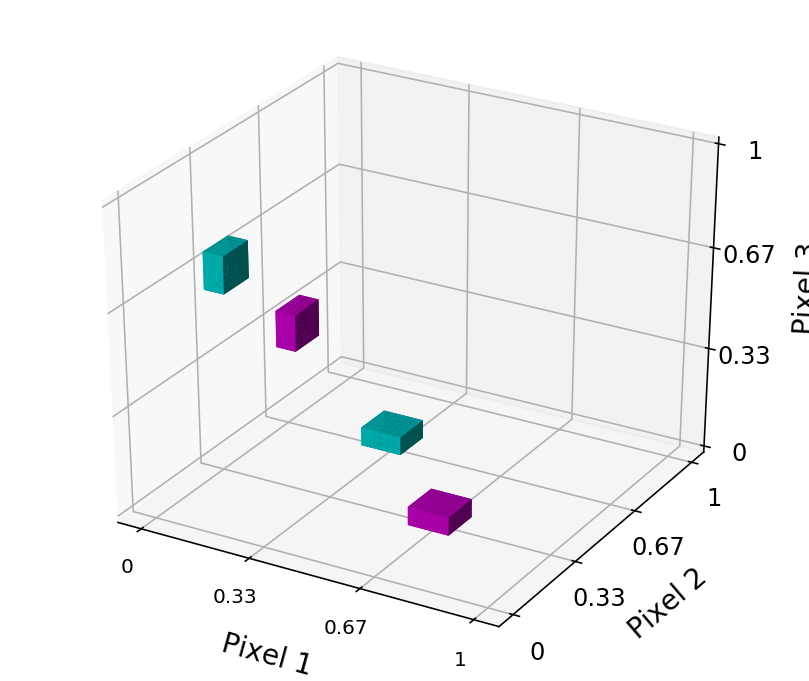

In [6]:
# fig = plt.figure(figsize=(8,7))
fig = plt.figure(figsize=(7,6))
fig.clf()

n_pts_per_dim = 7**2
# n_pts_per_dim = 20

# Set locations for down ramp (class 0)
voxels0 = np.zeros((n_pts_per_dim, n_pts_per_dim, n_pts_per_dim))
for p1 in range(int(n_pts_per_dim*(0.666-0.05)), int(np.ceil(n_pts_per_dim*(0.666+0.05)))):
    for p2 in range(int(n_pts_per_dim*(0.333-0.05)), int(np.ceil(n_pts_per_dim*(0.333+0.05)))):
        for p3 in range(0, int(np.ceil(n_pts_per_dim*(0.05)))):
            voxels0[p1, p2, p3] = 1

for p1 in range(0, int(np.ceil(n_pts_per_dim*(0.05)))):
    for p2 in range(int(n_pts_per_dim*(0.666-0.05)), int(np.ceil(n_pts_per_dim*(0.666+0.05)))):
        for p3 in range(int(n_pts_per_dim*(0.333-0.05)), int(np.ceil(n_pts_per_dim*(0.333+0.05)))):
            voxels0[p1, p2, p3] = 1

# Set locations for up ramp (class 1)
voxels1 = np.zeros((n_pts_per_dim, n_pts_per_dim, n_pts_per_dim))
for p1 in range(int(n_pts_per_dim*(0.333-0.05)), int(np.ceil(n_pts_per_dim*(0.333+0.05)))):
    for p2 in range(int(n_pts_per_dim*(0.666-0.05)), int(np.ceil(n_pts_per_dim*(0.666+0.05)))):
        for p3 in range(0, int(np.ceil(n_pts_per_dim*(0.05)))):
            voxels1[p1, p2, p3] = 1

for p1 in range(0, int(np.ceil(n_pts_per_dim*(0.05)))):
    for p2 in range(int(n_pts_per_dim*(0.333-0.05)), int(np.ceil(n_pts_per_dim*(0.333+0.05)))):
        for p3 in range(int(n_pts_per_dim*(0.666-0.05)), int(np.ceil(n_pts_per_dim*(0.666+0.05)))):
            voxels1[p1, p2, p3] = 1

ax = fig.add_subplot(1, 1, 1, projection='3d')
_ = ax.voxels(voxels0, edgecolor='none', facecolors='m')
_ = ax.voxels(voxels1, edgecolor='none', facecolors='c')

ax.set_xticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_xticklabels(['0', '0.33', '0.67', '1'], fontsize=10)
ax.set_xlabel('Pixel 1', labelpad=10)
ax.set_yticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_yticklabels(['0', '0.33', '0.67', '1'])
ax.set_ylabel('Pixel 2', labelpad=10)
ax.set_zticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_zticklabels(['0', '0.33', '0.67', '1'])
ax.set_zlabel('Pixel 3', labelpad=10)

if save_figures:
    plt.savefig(os.path.join(dir_figures,'fig_decision_space_optimal.png'), bbox_inches='tight', pad_inches=0.5)

# Look at decision space for baseline model

In [7]:
# Put grid-spaced data through the baseline model, covering the possible input space with reasonable density.
dir_models = './saved_models_ramp/'
model_filename = dir_models + 'ramp_model_baseline.h5'
model = tf.keras.models.load_model(model_filename)

n_pts_per_dim = 7**2
# n_pts_per_dim = 20

# x = np.arange(0, 1+0.0001, 1/(n_pts_per_dim-1)).astype(np.float32)
x = np.arange(0, 1, 1/(n_pts_per_dim-1)).astype(np.float32)
X = np.meshgrid(x, x, x)
X = [x.flatten() for x in X]
points = np.stack(X, axis=1)

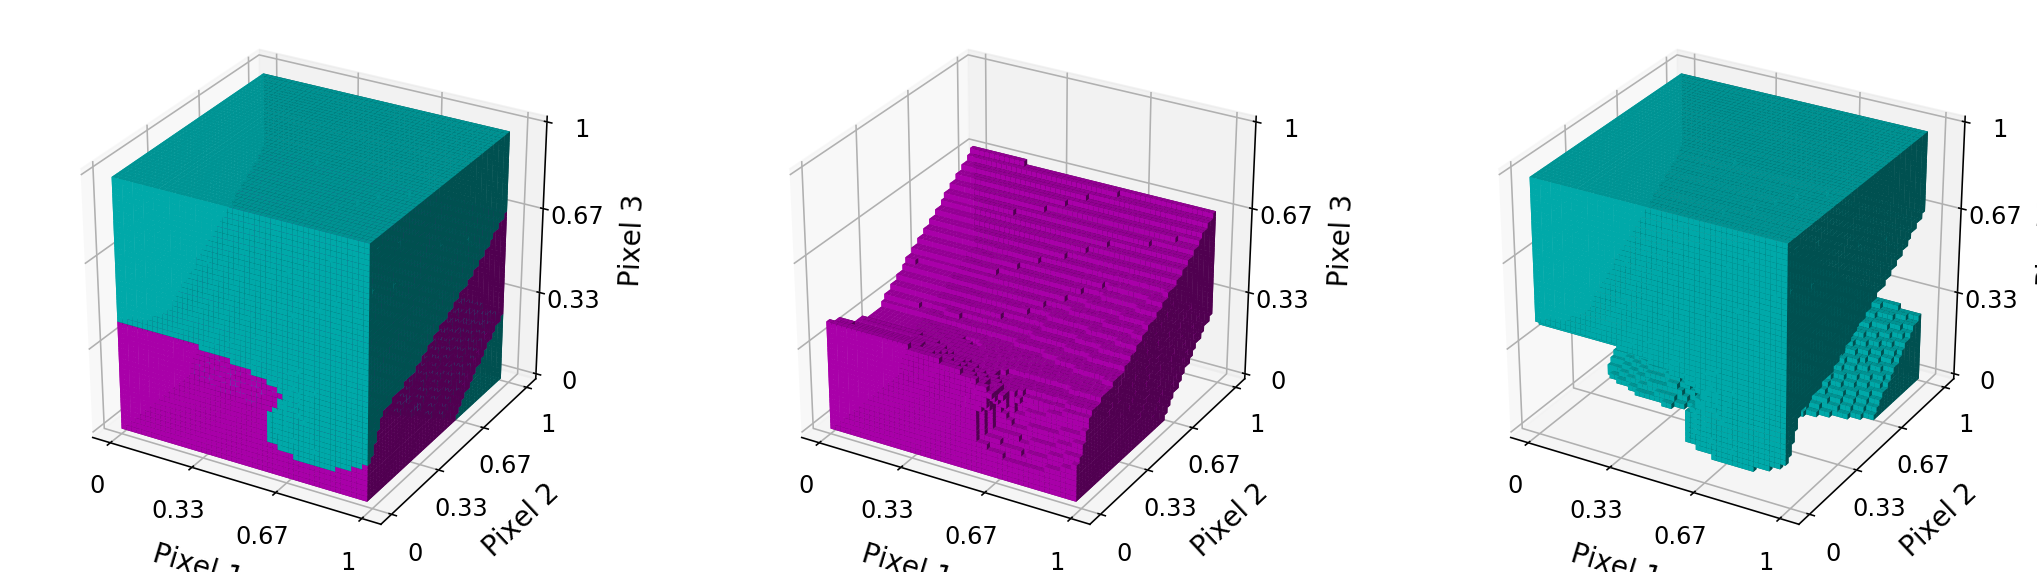

In [8]:
# Plot 3D volume of the decision spaces
output = model(points)
predicted_labels = np.argmax(output, axis=1)

fig = plt.figure(figsize=(18, 5))
lp = 10 # labelpad: spacing in points from the axes bounding box including ticks and tick labels

# voxels0 = np.zeros((n_pts_per_dim+1, n_pts_per_dim+1, n_pts_per_dim+1))
voxels0 = np.zeros((n_pts_per_dim, n_pts_per_dim, n_pts_per_dim))
points0 = (points[predicted_labels==0] * n_pts_per_dim).astype(np.int)
for i in range(len(points0)):
    voxels0[points0[i,0], points0[i,1], points0[i,2]] = 1

# voxels1 = np.zeros((n_pts_per_dim+1, n_pts_per_dim+1, n_pts_per_dim+1))
voxels1 = np.zeros((n_pts_per_dim, n_pts_per_dim, n_pts_per_dim))
points1 = (points[predicted_labels==1] * n_pts_per_dim).astype(np.int)
for i in range(len(points1)):
    voxels1[points1[i,0], points1[i,1], points1[i,2]] = 1

ax = fig.add_subplot(1, 3, 1, projection='3d')
_ = ax.voxels(voxels0, edgecolor='none', facecolors='m')
_ = ax.voxels(voxels1, edgecolor='none', facecolors='c')
ax.set_xticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_xticklabels(['0', '0.33', '0.67', '1'])
ax.set_yticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_yticklabels(['0', '0.33', '0.67', '1'])
ax.set_zticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_zticklabels(['0', '0.33', '0.67', '1'])
ax.set_xlabel('Pixel 1', labelpad=lp)
ax.set_ylabel('Pixel 2', labelpad=lp)
ax.set_zlabel('Pixel 3', labelpad=lp)

ax = fig.add_subplot(1, 3, 2, projection='3d')
_ = ax.voxels(voxels0, edgecolor='none', facecolors='m')
ax.set_xticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_xticklabels(['0', '0.33', '0.67', '1'])
ax.set_yticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_yticklabels(['0', '0.33', '0.67', '1'])
ax.set_zticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_zticklabels(['0', '0.33', '0.67', '1'])
ax.set_xlabel('Pixel 1', labelpad=lp)
ax.set_ylabel('Pixel 2', labelpad=lp)
ax.set_zlabel('Pixel 3', labelpad=lp)

ax = fig.add_subplot(1, 3, 3, projection='3d')
_ = ax.voxels(voxels1, edgecolor='none', facecolors='c')
ax.set_xticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_xticklabels(['0', '0.33', '0.67', '1'])
ax.set_yticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_yticklabels(['0', '0.33', '0.67', '1'])
ax.set_zticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_zticklabels(['0', '0.33', '0.67', '1'])
ax.set_xlabel('Pixel 1', labelpad=lp)
ax.set_ylabel('Pixel 2', labelpad=lp)
ax.set_zlabel('Pixel 3', labelpad=lp)

if save_figures:
    plt.savefig(os.path.join(dir_figures,'fig_decision_space_baseline.png'), bbox_inches='tight', pad_inches=0.5)

# Look at decision space for uniform model

In [9]:
# Put grid-spaced data through the baseline model, covering the possible input space with reasonable density.
dir_models = './saved_models_ramp/'
model_filename = dir_models + 'ramp_model_uniform.h5'
model = tf.keras.models.load_model(model_filename)

# x = np.arange(0, 1+0.0001, 1/(n_pts_per_dim-1)).astype(np.float32)
x = np.arange(0, 1, 1/(n_pts_per_dim-1)).astype(np.float32)
X = np.meshgrid(x, x, x)
X = [x.flatten() for x in X]
points = np.stack(X, axis=1)

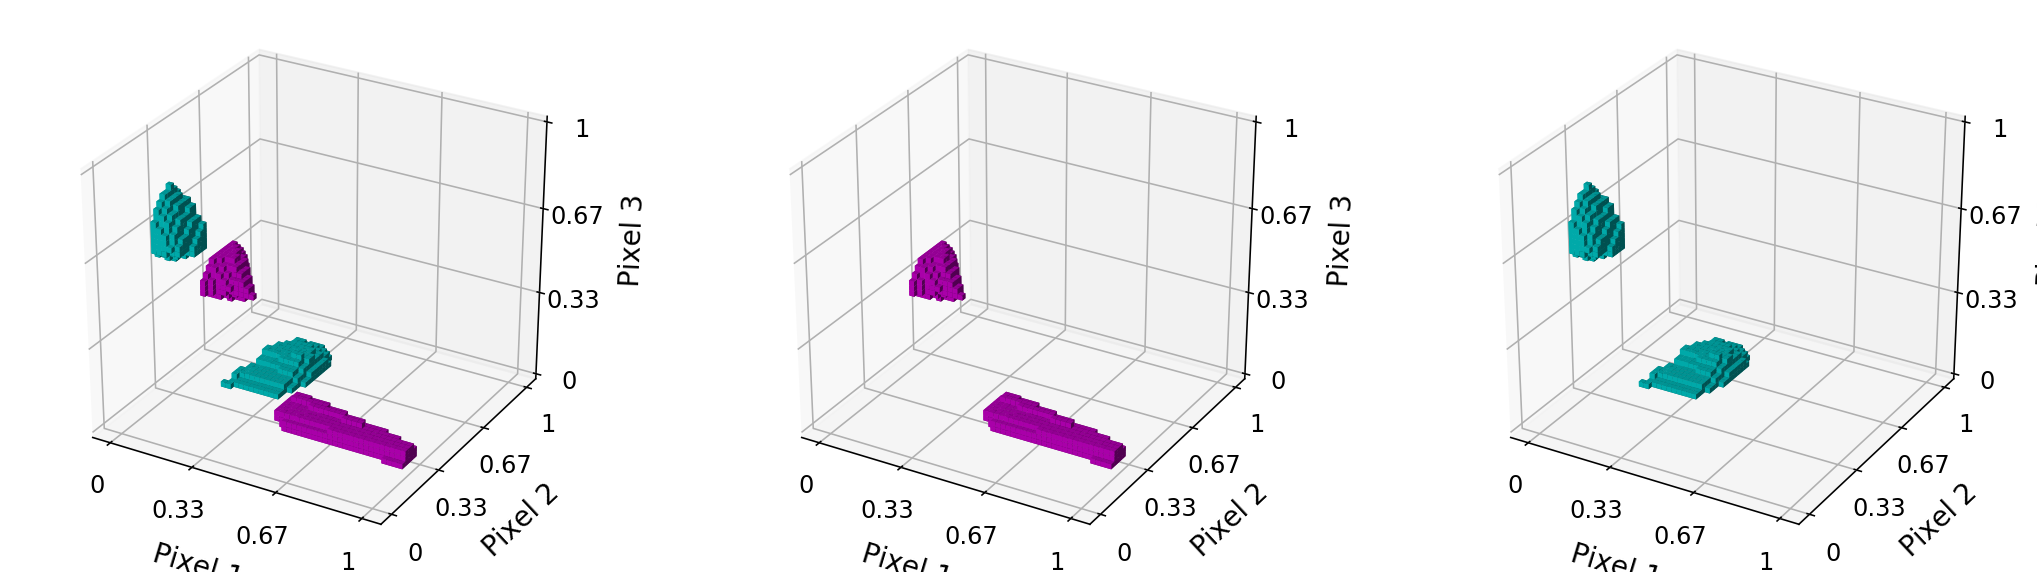

In [10]:
# Plot 3D volume of the decision spaces
output = model(points)
predicted_labels = np.argmax(output, axis=1)

fig = plt.figure(figsize=(18, 5))

# voxels0 = np.zeros((n_pts_per_dim+1, n_pts_per_dim+1, n_pts_per_dim+1))
voxels0 = np.zeros((n_pts_per_dim, n_pts_per_dim, n_pts_per_dim))
points0 = (points[predicted_labels==0] * n_pts_per_dim).astype(np.int)
for i in range(len(points0)):
    voxels0[points0[i,0], points0[i,1], points0[i,2]] = 1

# voxels1 = np.zeros((n_pts_per_dim+1, n_pts_per_dim+1, n_pts_per_dim+1))
voxels1 = np.zeros((n_pts_per_dim, n_pts_per_dim, n_pts_per_dim))
points1 = (points[predicted_labels==1] * n_pts_per_dim).astype(np.int)
for i in range(len(points1)):
    voxels1[points1[i,0], points1[i,1], points1[i,2]] = 1

ax = fig.add_subplot(1, 3, 1, projection='3d')
_ = ax.voxels(voxels0, edgecolor='none', facecolors='m')
_ = ax.voxels(voxels1, edgecolor='none', facecolors='c')
ax.set_xticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_xticklabels(['0', '0.33', '0.67', '1'])
ax.set_yticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_yticklabels(['0', '0.33', '0.67', '1'])
ax.set_zticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_zticklabels(['0', '0.33', '0.67', '1'])
ax.set_xlabel('Pixel 1', labelpad=lp)
ax.set_ylabel('Pixel 2', labelpad=lp)
ax.set_zlabel('Pixel 3', labelpad=lp)

ax = fig.add_subplot(1, 3, 2, projection='3d')
_ = ax.voxels(voxels0, edgecolor='none', facecolors='m')
ax.set_xticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_xticklabels(['0', '0.33', '0.67', '1'])
ax.set_yticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_yticklabels(['0', '0.33', '0.67', '1'])
ax.set_zticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_zticklabels(['0', '0.33', '0.67', '1'])
ax.set_xlabel('Pixel 1', labelpad=lp)
ax.set_ylabel('Pixel 2', labelpad=lp)
ax.set_zlabel('Pixel 3', labelpad=lp)

ax = fig.add_subplot(1, 3, 3, projection='3d')
_ = ax.voxels(voxels1, edgecolor='none', facecolors='c')
ax.set_xticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_xticklabels(['0', '0.33', '0.67', '1'])
ax.set_yticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_yticklabels(['0', '0.33', '0.67', '1'])
ax.set_zticks(np.arange(0, n_pts_per_dim+1+0.01, (n_pts_per_dim)/3))
ax.set_zticklabels(['0', '0.33', '0.67', '1'])
ax.set_xlabel('Pixel 1', labelpad=lp)
ax.set_ylabel('Pixel 2', labelpad=lp)
ax.set_zlabel('Pixel 3', labelpad=lp)

if save_figures:
    plt.savefig(os.path.join(dir_figures,'fig_decision_space_uniform.png'), bbox_inches='tight', pad_inches=0.5)